<a href="https://colab.research.google.com/github/Laurarpoa/Grupo-de-trabajo-/blob/main/base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Trabajo de Acompañamiento - Laura Restrepo, Tatiana Monteagudo

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url_csv = "https://docs.google.com/spreadsheets/d/1fDiQPvO-fW_SAU1cfr-CbTT8D1dedajFLqvQv3iJ1Bo/export?format=csv&gid=2075267814"
df_online = pd.read_csv(url_csv)

print(df_online.head())

   Unnamed: 0  expediente                                    producto  \
0           0    20076357                                    RANLAT ®   
1           1    19937061  NORAVER- G CONTRA LOS SINTOMAS DE LA GRIPA   
2           2    19936459                            ZETIA® TABLETAS.   
3           3    19952616                        PENTOXIFILINA 400 MG   
4           4    20121750                              ADORLAN® FORTE   

                      titular        registrosanitario fechaexpedicion  \
0    MEGALABS COLOMBIA S.A.S.  INVIMA 2023M-0016597-R1      11/20/2015   
1          TECNOQUIMICAS S.A.  INVIMA 2023M-0002622-R2      07/25/2003   
2      ORGANON COLOMBIA S.A.S  INVIMA 2023M-0002492-R3      06/12/2003   
3          TECNOQUIMICAS S.A.  INVIMA 2023M-0004953-R2      10/28/2005   
4  GRÜNENTHAL COLOMBIANA S.A.  INVIMA 2023M-0018389-R1      09/11/2018   

  fechavencimiento estadoregistro  expedientecum  consecutivocum  ...  \
0       08/28/2028        Vigente       200

In [ ]:
df_online.shape

(86315, 30)

In [ ]:
df_online.columns

Index(['Unnamed: 0', 'expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'estadoregistro',
       'expedientecum', 'consecutivocum', 'cantidadcum',
       'descripcioncomercial', 'estadocum', 'fechaactivo', 'fechainactivo',
       'muestramedica', 'unidad', 'atc', 'descripcionatc', 'viaadministracion',
       'concentracion', 'principioactivo', 'unidadmedida', 'cantidad',
       'unidadreferencia', 'formafarmaceutica', 'nombrerol', 'tiporol',
       'modalidad', 'IUM'],
      dtype='object')

In [ ]:
#Eliminación de columnas
df_online = df_online.drop(['IUM', 'unidadmedida', 'unidad', 'fechaactivo', 'fechainactivo', 'estadoregistro', 'unidadreferencia' ], axis=1, errors='ignore')

In [ ]:
df_online.isnull().sum()

,0
Unnamed: 0,0
expediente,0
producto,0
titular,0
registrosanitario,0
fechaexpedicion,100
fechavencimiento,0
expedientecum,0
consecutivocum,0
cantidadcum,0


In [ ]:
df_online.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
86310,0
86311,0
86312,0
86313,0


In [ ]:
df_onlinetypes=df_online.dtypes
print(df_onlinetypes)

Unnamed: 0               int64
expediente               int64
producto                object
titular                 object
registrosanitario       object
fechaexpedicion         object
fechavencimiento        object
expedientecum            int64
consecutivocum           int64
cantidadcum              int64
descripcioncomercial    object
estadocum               object
muestramedica           object
atc                     object
descripcionatc          object
viaadministracion       object
concentracion           object
principioactivo         object
cantidad                 int64
formafarmaceutica       object
nombrerol               object
tiporol                 object
modalidad               object
dtype: object


In [ ]:
df_online.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
86310,False
86311,False
86312,False
86313,False


In [ ]:
df_online['fechaexpedicion'] = pd.to_datetime(df_online['fechaexpedicion'], format='mixed', errors='coerce')
df_online['fechavencimiento'] = pd.to_datetime(df_online['fechavencimiento'], format='mixed', errors='coerce')
fecha = '2023-09-01'
fecha_actual = pd.to_datetime(fecha)
diferencia = df_online['fechavencimiento'] - fecha_actual
df_online['Años_de_vigencia_restantes'] = round(diferencia.dt.days / 365)

In [ ]:
df_online = df_online.reindex(columns=['expediente', 'producto', 'titular', 'registrosanitario',
       'fechaexpedicion', 'fechavencimiento', 'expedientecum', 'Años_de_vigencia_restantes',
       'consecutivocum', 'cantidadcum', 'descripcioncomercial', 'estadocum',
       'muestramedica', 'atc', 'descripcionatc', 'viaadministracion',
       'concentracion', 'principioactivo', 'cantidad', 'formafarmaceutica',
       'nombrerol', 'tiporol', 'modalidad'])

In [ ]:
df_online

,expediente,producto,titular,registrosanitario,fechaexpedicion,fechavencimiento,expedientecum,Años_de_vigencia_restantes,consecutivocum,cantidadcum,...,atc,descripcionatc,viaadministracion,concentracion,principioactivo,cantidad,formafarmaceutica,nombrerol,tiporol,modalidad
0,20076357,RANLAT ®,MEGALABS COLOMBIA S.A.S.,INVIMA 2023M-0016597-R1,2015-11-20,2028-08-28,20076357,5.0,5,100,...,V03AE02,SEVELAMER,ORAL,A,SEVELAMERO CARBONATO ANHIDRO,800,TABLETA CUBIERTA CON PELICULA,MEGALABS COLOMBIA S.A.S.,IMPORTADOR,IMPORTAR Y VENDER
1,19937061,NORAVER- G CONTRA LOS SINTOMAS DE LA GRIPA,TECNOQUIMICAS S.A.,INVIMA 2023M-0002622-R2,2003-07-25,2028-08-22,19937061,5.0,4,108,...,M01AE51,IBUPROFEN COMBINACIONES,ORAL,A,IBUPROFENO GRANULADO 85% (IBUPROFENO. CELULOSA...,200,CAPSULA DURA,TECNOQUIMICAS S.A.,IMPORTADOR,IMPORTAR. SEMIELABORAR Y VENDER
2,19936459,ZETIA® TABLETAS.,ORGANON COLOMBIA S.A.S,INVIMA 2023M-0002492-R3,2003-06-12,2028-08-22,19936459,5.0,8,90,...,C10AX09,EZETIMIBE,ORAL,A,EZETIMIBA (SCH 58235) MICRONIZADO,10,TABLETA,MSD INTERNATIONAL GMBH,FABRICANTE,IMPORTAR Y VENDER
3,19952616,PENTOXIFILINA 400 MG,TECNOQUIMICAS S.A.,INVIMA 2023M-0004953-R2,2005-10-28,2028-08-08,19952616,5.0,19,16,...,C04AD03,PENTOXIFILINA,ORAL,A,PENTOXIFILINA,400,TABLETA DE LIBERACION PROLONGADA,TECNOQUIMICAS S.A. (PLANTA JAMUNDÍ),FABRICANTE,FABRICAR Y VENDER
4,20121750,ADORLAN® FORTE,GRÜNENTHAL COLOMBIANA S.A.,INVIMA 2023M-0018389-R1,2018-09-11,2028-08-08,20121750,5.0,4,30,...,N02AJ15,TRAMADOL Y DICLOFENACO,ORAL,A,TRAMADOL CLORHIDRATO,50,TABLETA,GRÜNENTHAL COLOMBIANA S.A.,IMPORTADOR,IMPORTAR Y VENDER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86310,20009806,GRIPOFEN CAPSULAS,LABORATORIOS SERES S.A.S.,INVIMA 2020M-0010823-R1,2010-05-25,2025-12-28,20009806,2.0,7,8,...,N02BE51,PARACETAMOL COMBINACIONES EXCLUYENDO SICOLEPTICOS,ORAL,A,ACETAMINOFEN,500,CAPSULA DURA,TRIDEX FARMACEUTICA S.A.,FABRICANTE,FABRICAR Y VENDER
86311,20006406,AMIGDAL-B®,NATURALMENTE NF S.A.S.,INVIMA 2020M-0010147-R1,2009-10-20,2025-02-11,20006406,1.0,8,12,...,R02AA99,COMBINACIONES,BUCAL,A,CETILPIRIDINIO CLORURO,1,TABLETA BUCAL,COLOMPACK S.A,FABRICANTE,FABRICAR Y VENDER
86312,20149123,ALGISIL® 500 MG SOFTGEL,GLOBAL INTERNATIONAL MEDICINE S.A.S. GIMED S.A.S.,INVIMA 2020M-0019813,2020-09-09,2025-09-24,20149123,2.0,4,50,...,N02BE01,PARACETAMOL,ORAL,A,ACETAMINOFEN,500,CAPSULA BLANDA,SOFTGEL HEALTHCARE PRIVATE LIMITED,FABRICANTE,IMPORTAR. ENVASAR Y VENDER
86313,19979152,TIAMAX® 200,MEGALABS COLOMBIA S.A.S.,INVIMA 2021M-0007633-R1,2007-12-13,2026-08-17,19979152,3.0,2,15,...,N05AH04,QUETIAPINA,ORAL,A,QUETIAPINA FUMARATO EQUIVALENTE A QUETIAPINA,200,TABLETA RECUBIERTA,MEGA LABS S.A,FABRICANTE,IMPORTAR Y VENDER


In [ ]:
df = df_online.fillna('NA')

In [ ]:
df.to_csv (r"https://docs.google.com/spreadsheets/d/1fDiQPvO-fW_SAU1cfr-CbTT8D1dedajFLqvQv3iJ1Bo/export?format=csv&gid=2075267814")

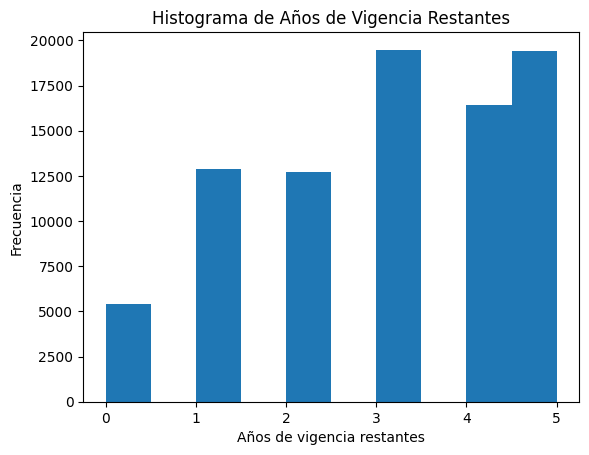

In [ ]:
plt.hist(df['Años_de_vigencia_restantes'])
plt.xlabel('Años de vigencia restantes')
plt.ylabel('Frecuencia')
plt.title('Histograma de Años de Vigencia Restantes')
plt.show()

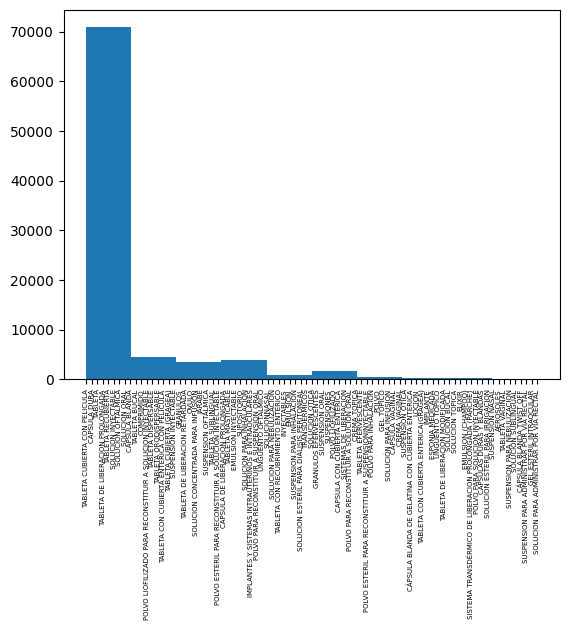

In [ ]:
#Histograma de freciencias de la formafarmaceutica
plt.hist(df['formafarmaceutica'])
plt.xticks(rotation=90)
plt.xticks(fontsize=5)
plt.show()

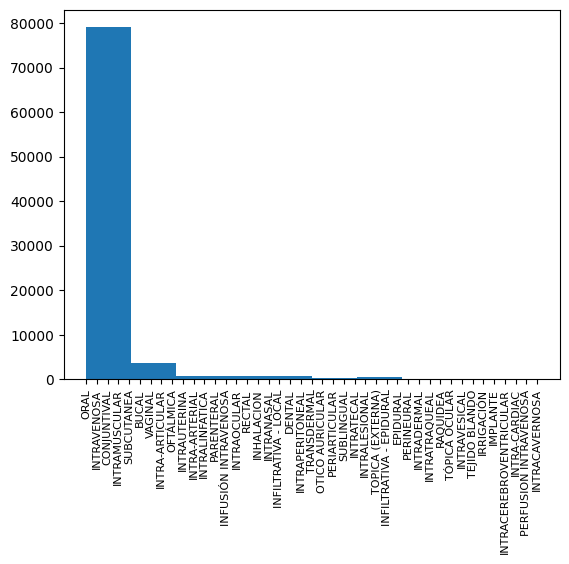

In [ ]:
#Histograma de frecuencias de la via de administración
plt.hist(df['viaadministracion'])
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.show()

In [ ]:
#Porcentaje de cum activos y cum inactivos
counts = df_online['estadocum'].value_counts()
total = counts.sum()
porcentaje_activos = counts['Activo'] / total * 100
porcentaje_inactivos = counts['Inactivo'] / total * 100
print('Medicamentos activos:', porcentaje_activos, '%')
print('Medicamentos inactivos:', porcentaje_inactivos, '%')

Medicamentos activos: 79.97335341481782 %
Medicamentos inactivos: 20.02664658518218 %


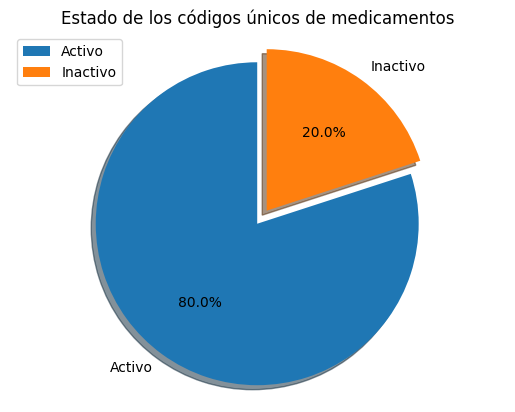

In [ ]:
# Gráfico circular para estadocum
Estado_cum = 'Activo', 'Inactivo'
sizes = [80, 20]
explode = (0.1, 0)
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=Estado_cum, autopct='%1.1f%%',
        shadow=True, startangle=90)
#señalamos la forma, en este caso 'equal' es para dar forma circular
ax1.axis('equal')
plt.title("Estado de los códigos únicos de medicamentos")
plt.legend()
plt.show()

In [ ]:
#Calculo para hallar los cinco valores más comunes y sus porcentajes en 'viaadministracion'

counts = df['viaadministracion'].value_counts()

total = counts.sum()
porcentajes = counts / total * 100

print('Los cinco valores más comunes en la columna de viaadministracion son:')
for i, (va, count) in enumerate(counts.items()):
    if i >= 5:
        break
    porcentaje = porcentajes[va]
    print(f'{va}: {count} ({porcentaje:.1f}%)')

Los cinco valores más comunes en la columna de viaadministracion son:
ORAL: 65500 (75.9%)
INTRAVENOSA: 7382 (8.6%)
INTRAMUSCULAR: 3552 (4.1%)
SUBCUTANEA: 1929 (2.2%)
BUCAL: 1324 (1.5%)


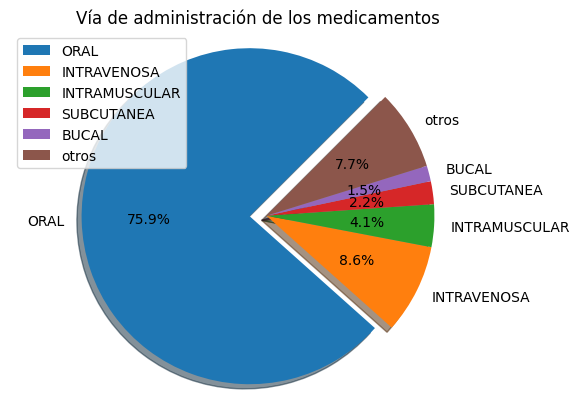

In [ ]:
#Gráfico circular para via de administración
viaadministracion = 'ORAL', 'INTRAVENOSA', 'INTRAMUSCULAR','SUBCUTANEA', 'BUCAL', 'otros'
sizes = [75.9, 8.6, 4.1, 2.2, 1.5, 7.7]
explode = (0.1, 0, 0, 0, 0,0)
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=viaadministracion, autopct='%1.1f%%',
        shadow=True, startangle=45)

ax1.axis('equal')
plt.title("Vía de administración de los medicamentos")
plt.legend()
plt.show()

In [ ]:
#Calculo para hallar los cinco valores más comunes y sus porcentajes en 'formafarmaceutica'
counts = df['formafarmaceutica'].value_counts()

total = counts.sum()
porcentajes = counts / total * 100

print('Los cinco valores más comunes en la columna de formafarmaceutica son:')
for i, (va, count) in enumerate(counts.items()):
    if i >= 5:
        break
    porcentaje = porcentajes[va]
    print(f'{va}: {count} ({porcentaje:.1f}%)')

Los cinco valores más comunes en la columna de formafarmaceutica son:
TABLETA RECUBIERTA: 22579 (26.2%)
TABLETA: 12391 (14.4%)
SOLUCION INYECTABLE: 10723 (12.4%)
CAPSULA DURA: 10670 (12.4%)
CAPSULA BLANDA: 4988 (5.8%)


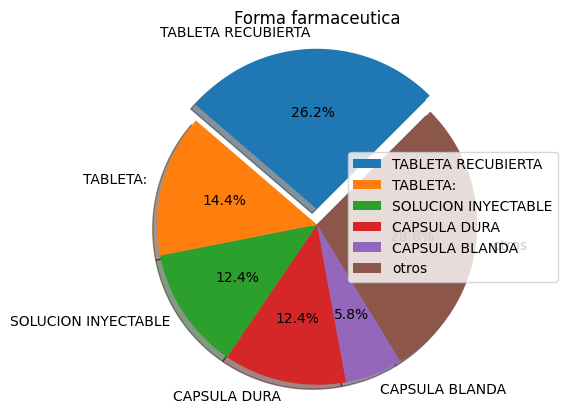

In [ ]:
formafarmaceutica = 'TABLETA RECUBIERTA', 'TABLETA:', 'SOLUCION INYECTABLE','CAPSULA DURA', 'CAPSULA BLANDA', 'otros'
sizes = [26.2, 14.4, 12.4, 12.4, 5.8, 28.8]
explode = (0.1, 0, 0, 0, 0, 0)
fig, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=formafarmaceutica, autopct='%1.1f%%',
        shadow=True, startangle=45)

ax1.axis('equal')
plt.title("Forma farmaceutica")
plt.legend()
plt.show()

In [ ]:
correlation = df_online['expedientecum'].corr(df['cantidadcum'])
print(f'cociente de correlación: {correlation}')

cociente de correlación: -0.027450529311517126


In [ ]:
correlation = df_online['consecutivocum'].corr(df['expediente'])
print(f'cociente de correlación: {correlation}')

cociente de correlación: 0.057832873699678045


In [ ]:
correlation = df_online['cantidadcum'].corr(df['cantidad'])
print(f'cociente de correlación: {correlation}')

cociente de correlación: -0.0012655297836561825


In [ ]:
correlation = df_online['cantidadcum'].corr(df['consecutivocum'])
print(f'cociente de correlación: {correlation}')

cociente de correlación: 0.07555118780116933
